<b>Importing Libraries</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVR
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

-------------

<b>Loading Data And Performing Feature Analysis</b>

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


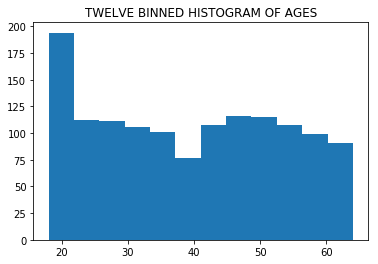

In [3]:
# AGE DISTRIBUTION
plt.hist(data["age"], bins=12) # RANGES: 18-21, 22-25, 26-29, 30-33, 34-37, 38-41, 42-45, 46-49, 50-53, 54-57, 58-61, 62-65
plt.title("TWELVE BINNED HISTOGRAM OF AGES")
plt.show()

==GENDER COUNTS==
male      676
female    662
Name: sex, dtype: int64


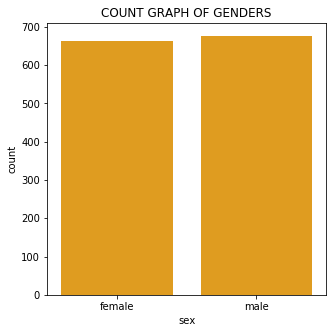

In [4]:
# GENDERS

print("==GENDER COUNTS==")
print(data.sex.value_counts())

fig = plt.figure(figsize=(11,5))

fig.add_subplot(1,2,1)
plt.title("COUNT GRAPH OF GENDERS")
sns.countplot(data.sex, color="orange")
plt.show()

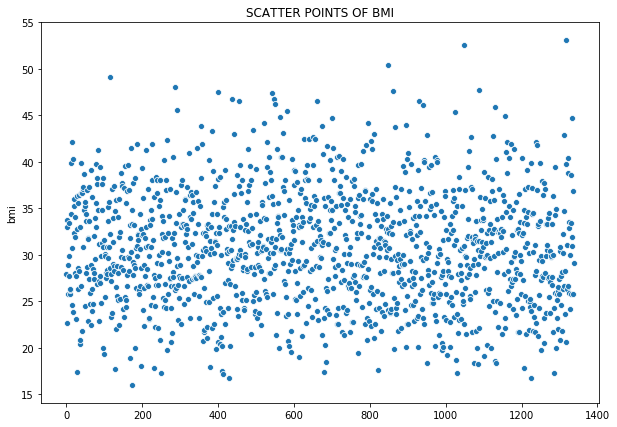

In [5]:
# BMI SCATTER PLOT
plt.figure(figsize=(10,7))
plt.title("SCATTER POINTS OF BMI")
sns.scatterplot(x=data.index, y=data.bmi)
plt.show()

==CHILDREN COUNTS==
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


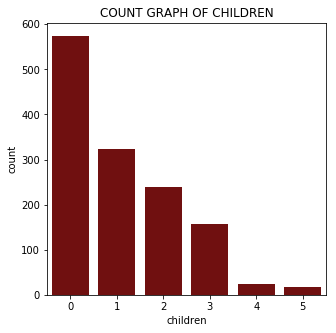

In [6]:
# CHILDREN

print("==CHILDREN COUNTS==")
print(data.children.value_counts())

fig = plt.figure(figsize=(11,5))

fig.add_subplot(1,2,1)
plt.title("COUNT GRAPH OF CHILDREN")
sns.countplot(data.children, color="maroon")
plt.show()

==SMOKER COUNTS==
no     1064
yes     274
Name: smoker, dtype: int64


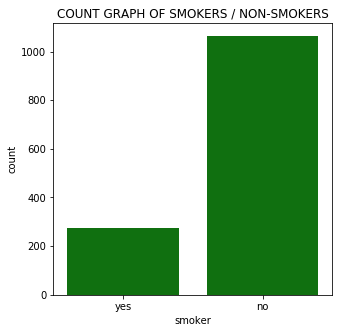

In [7]:
# SMOKERS

print("==SMOKER COUNTS==")
print(data.smoker.value_counts())

fig = plt.figure(figsize=(11,5))

fig.add_subplot(1,2,1)
plt.title("COUNT GRAPH OF SMOKERS / NON-SMOKERS")
sns.countplot(data.smoker, color="green")
plt.show()

==REGION COUNTS==
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


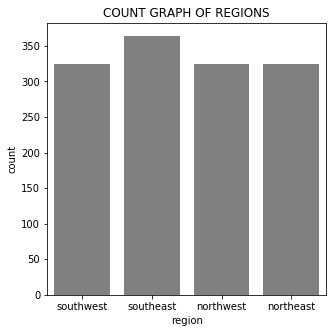

In [8]:
# REGIONS

print("==REGION COUNTS==")
print(data.region.value_counts())

fig = plt.figure(figsize=(11,5))

fig.add_subplot(1,2,1)
plt.title("COUNT GRAPH OF REGIONS")
sns.countplot(data.region, color="gray")
plt.show()

-------

<b>Data Preprocessing (Cleaning & Encoding)</b>

In [9]:
# Dropping the region feature to make the data general 
data = data.drop("region",axis=1)
data.tail()

,age,sex,bmi,children,smoker,charges
1333,50,male,30.97,3,no,10600.5483
1334,18,female,31.92,0,no,2205.9808
1335,18,female,36.85,0,no,1629.8335
1336,21,female,25.80,0,no,2007.9450
1337,61,female,29.07,0,yes,29141.3603


In [10]:
# Mean Of Charges
data.charges.mean()

13270.422265141257

In [11]:
# Standard Deviation Of Charges
data.charges.std()

12110.011236693994

In [12]:
data[data["charges"]<15000].shape

(980, 6)

In [13]:
# As Analyzed that majority of the data lies under charges of 15000, 
# so considering the data with charges more than 15000 as outliers, thus dropping them

data = data.query("charges < 15000") 
data = data.reset_index(drop=True)
data.head()

,age,sex,bmi,children,smoker,charges
0,18,male,33.77,1,no,1725.5523
1,28,male,33.00,3,no,4449.4620
2,32,male,28.88,0,no,3866.8552
3,31,female,25.74,0,no,3756.6216
4,46,female,33.44,1,no,8240.5896


In [14]:
# Mean Of Charges After Cleaning
data.charges.mean()

7112.209422580604

In [15]:
# Standard Deviation Of Charges After Cleaning
data.charges.std()

3869.9307859132646

In [16]:
# Encoding the Categorical features

nominals = ["smoker","sex"]
lbe = LabelEncoder()
for i in nominals:
    encode = lbe.fit_transform(data[i]) #GENDERS: female=0, male=1 #SMOKER: no=0, yes=1
    data.replace(to_replace = data[i].tolist(), value=encode, inplace=True)

In [17]:
data.head(10)

,age,sex,bmi,children,smoker,charges
0,18,1,33.77,1,0,1725.5523
1,28,1,33.00,3,0,4449.4620
2,32,1,28.88,0,0,3866.8552
3,31,0,25.74,0,0,3756.6216
4,46,0,33.44,1,0,8240.5896
5,37,0,27.74,3,0,7281.5056
6,37,1,29.83,2,0,6406.4107
7,25,1,26.22,0,0,2721.3208
8,23,1,34.40,0,0,1826.8430
9,56,0,39.82,0,0,11090.7178


--------

<b>Making X And Y Sets (Train & Test)</b>

In [18]:
X = data[["age","sex","bmi","children","smoker"]]
y = data["charges"]

In [88]:
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.9, random_state=75)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [89]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(882, 5)
(98, 5)
(882,)
(98,)


------

<b>Building Linear SVR Model & Fitting Train Sets</b>

In [90]:
model = LinearSVR(epsilon=0.2, C=7.5, max_iter=12, random_state=1)

In [91]:
model.fit(x_train, y_train)

LinearSVR(C=7.5, dual=True, epsilon=0.2, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=12,
     random_state=1, tol=0.0001, verbose=0)

---

<b>Predicting X Test Sets</b>

In [92]:
y_pred = model.predict(x_test)

In [93]:
dict_result = {"Actual Y": y_test, "Predicted Y": y_pred}
result = pd.DataFrame(data=dict_result).reset_index(drop=True)

In [94]:
result.head(10)

,Actual Y,Predicted Y
0,4889.03680,6128.685753
1,2362.22905,1793.845725
2,2473.33410,2729.471108
3,2055.32490,1988.354493
4,1694.79640,2388.215528
5,6082.40500,6493.850267
6,2585.85065,3006.819466
7,3645.08940,4599.203108
8,1137.01100,799.826511
9,2155.68150,2742.455068


In [95]:
result.tail(10)

,Actual Y,Predicted Y
88,2789.05740,2995.432896
89,6457.84340,6970.191846
90,10381.47870,9850.299950
91,2775.19215,3868.871730
92,6796.86325,6912.794074
93,8615.30000,9236.874550
94,3594.17085,4325.409277
95,11454.02150,11573.969015
96,4762.32900,5054.061220
97,1972.95000,3048.014715


------

<b>Analyzing Results & Metrics</b>

In [96]:
mse = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error:",mse)
print("Accuracy:",score*100)

Mean Absolute Error: 723.7218911880026
Accuracy: 94.02111175618253


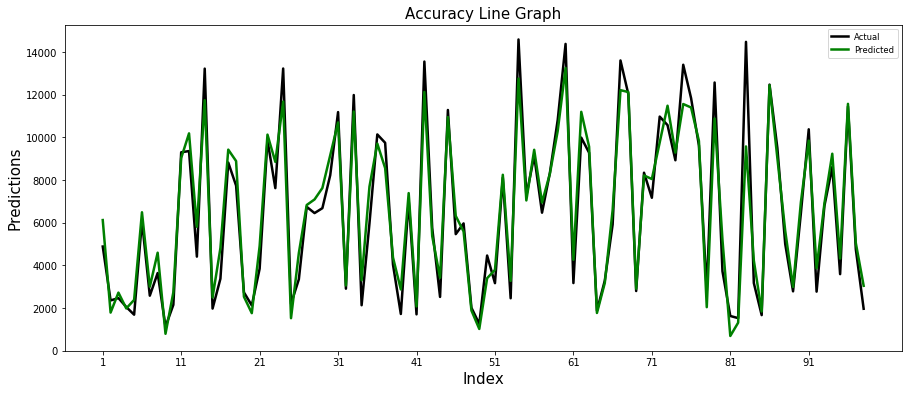

In [101]:
c = [i for i in range(1,99)]
fig = plt.figure(figsize=(15,6))
plt.plot(c,y_test, color="k", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="g", linewidth=2.5, linestyle="-")
plt.title("Accuracy Line Graph", fontsize=15)
plt.xlabel("Index", fontsize=15)
plt.ylabel("Predictions", fontsize=15)
plt.legend(labels=["Actual","Predicted"], loc=1, fontsize="small")
plt.xticks(np.arange(1,99,10))
plt.show()

-----------